<a href="https://colab.research.google.com/github/8464947452/final-project-fake-news-detection/blob/main/fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Description**

**Introduction**
The aim of this project is to apply Machine Learning (ML) and Natural Language Processing (NLP) techniques to detect and classify fake news articles. The project investigates how well computational methods can differentiate between real and fabricated statements by analyzing linguistic and semantic cues.
It will compare traditional ML models (such as TF-IDF + Logistic Regression) against advanced transformer-based architectures (like BERT) to determine which approach provides higher accuracy and interpretability. Explainability tools (e.g., SHAP) will be used to identify key features influencing prediction outcomes, offering insights into patterns of misinformation.

**Research Questions:**
1. Can ML and NLP approaches reliably distinguish fake from real news articles across different domains?

2. Which linguistic and semantic cues most strongly indicate misinformation when analyzed using explainability methods?

3. How does model performance vary between shallow ML techniques and deep transformer models?

**Dataset Information**

**Name:** LIAR Dataset – Fake News Detection

**Source:** University of California, Santa Barbara – William Yang Wang (2017)

**Origin:** Collected from PolitiFact (2007–2016)

**Details:** Contains over 12,000 short political statements, each manually labeled for truthfulness from “pants-on-fire” to “true.”

# **Importing Files**

In [ ]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# **Reading Dataset**

In [ ]:
df = pd.read_csv('train.tsv', sep='\t', header=None, dtype=str)


# **Printing Shape**

In [ ]:
print("Shape:", df.shape)

Shape: (10240, 14)


# **Printing First Few Rows**

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0,0,0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7,19,3,5,44,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15,9,20,19,2,an interview on CNN


# **Droping unnecessary columns and labeling the columns in dataset**

In [ ]:
df.columns = [
    "id", "label", "statement", "subject", "speaker", "speaker_job_title",
    "state_info", "party_affiliation", "barely_true_counts", "false_counts",
    "half_true_counts", "mostly_true_counts", "pants_on_fire_counts",
    "context"
]



# Drop unnecessary id column if present
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

In [ ]:
df

,label,statement,subject,speaker,speaker_job_title,state_info,party_affiliation,barely_true_counts,false_counts,half_true_counts,mostly_true_counts,pants_on_fire_counts,context
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0,1,0,0,0,a mailer
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0,0,1,1,0,a floor speech.
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70,71,160,163,9,Denver
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7,19,3,5,44,a news release
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15,9,20,19,2,an interview on CNN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10235,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0,1,1,1,0,"interview on ""The Colbert Report"""
10236,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0,0,0,1,0,an interview
10237,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4,11,5,3,3,a Republican presidential debate
10238,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3,1,3,0,0,a televised debate on Miami's WPLG-10 against ...


# **Checking Missing Values**

In [ ]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
label                      0
statement                  0
subject                    2
speaker                    2
speaker_job_title       2898
state_info              2210
party_affiliation          2
barely_true_counts         2
false_counts               2
half_true_counts           2
mostly_true_counts         2
pants_on_fire_counts       2
context                  102
dtype: int64


In [ ]:
df["context"]

,context
0,a mailer
1,a floor speech.
2,Denver
3,a news release
4,an interview on CNN
...,...
10235,"interview on ""The Colbert Report"""
10236,an interview
10237,a Republican presidential debate
10238,a televised debate on Miami's WPLG-10 against ...


# **Showing Basic Information**

In [ ]:
# Show basic info
print("\nTarget Variable (label) Overview:")
print(df['label'].value_counts())
print("\nUnique Labels:", df['label'].unique())


Target Variable (label) Overview:
label
half-true      2114
false          1995
mostly-true    1962
true           1676
barely-true    1654
pants-fire      839
Name: count, dtype: int64

Unique Labels: ['false' 'half-true' 'mostly-true' 'true' 'barely-true' 'pants-fire']


# **EDA**

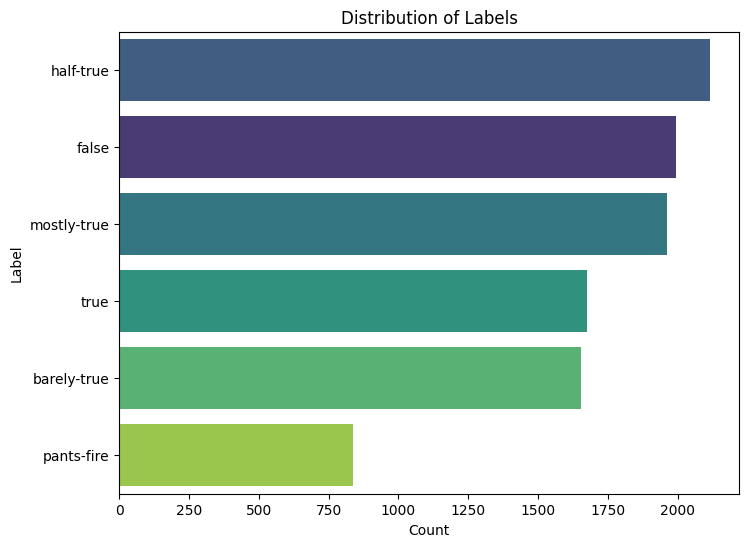

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='label', order=df['label'].value_counts().index, palette='viridis', hue='label', legend=False)
plt.title('Distribution of Labels')
plt.xlabel('Count')
plt.ylabel('Label')
plt.show()

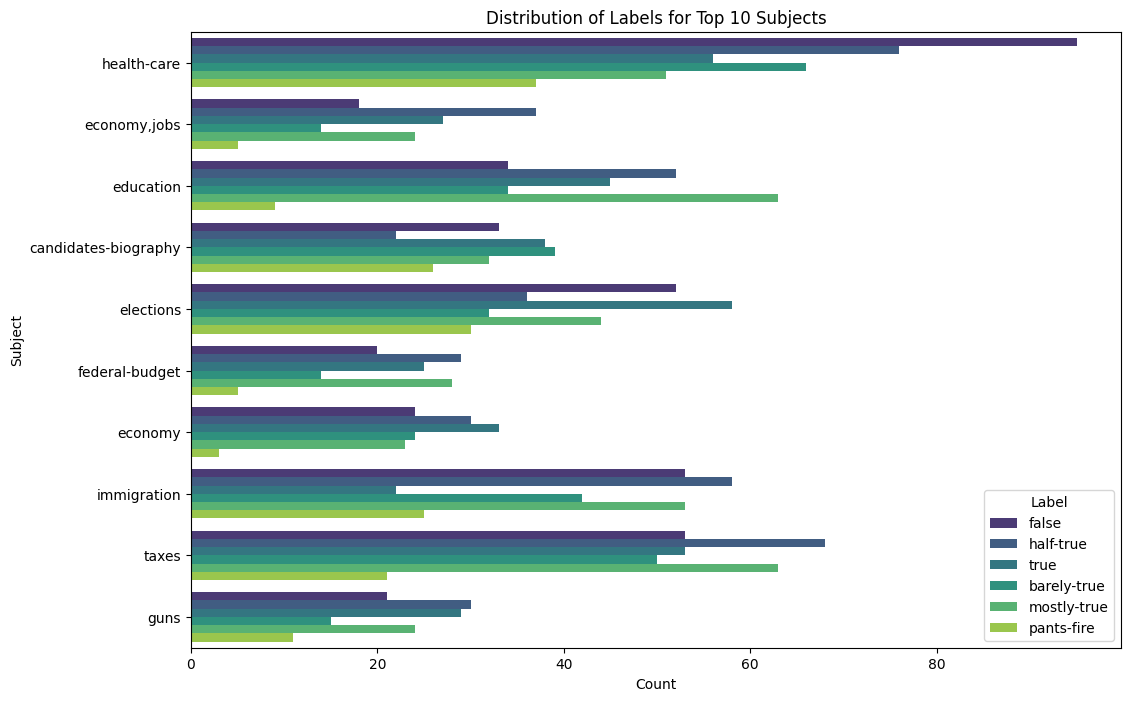

In [ ]:
top_subjects = df['subject'].value_counts().nlargest(10).index
plt.figure(figsize=(12, 8))
sns.countplot(data=df[df['subject'].isin(top_subjects)], y='subject', hue='label', palette='viridis')
plt.title('Distribution of Labels for Top 10 Subjects')
plt.xlabel('Count')
plt.ylabel('Subject')
plt.legend(title='Label')
plt.show()

# **Label Encoding the dataset**

In [ ]:
le = LabelEncoder()
df['label_encoded'] = le.fit_transform(df['label'])
print("\nLabel Mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Label Mapping: {'barely-true': np.int64(0), 'false': np.int64(1), 'half-true': np.int64(2), 'mostly-true': np.int64(3), 'pants-fire': np.int64(4), 'true': np.int64(5)}


## **Data Preprocessing**
Here we perform the requested cleaning steps:
- **Noise Removal:** Removing special characters and numbers.
- **Stopword Removal:** Removing common words like "the", "is", "at".
- **Lemmatization:** Converting words to their base form (e.g., "running" -> "run").
- **Feature Engineering:** Creating a "Rich Text" field that combines Speaker, Subject, and Statement.

In [ ]:
def clean_text(text):
        text = str(text).lower()
        text = re.sub(r'http\S+', '', text)            # remove links
        text = re.sub(r'[^a-z\s]', '', text)           # remove punctuation/numbers
        text = re.sub(r'\s+', ' ', text).strip()       # normalize spaces
        return text
df['clean_statement'] = df['statement'].apply(clean_text)

In [ ]:
df.fillna({
    'subject':'unknown',
    'speaker':'unknown',
    'speaker_job_title':'unknown',
    'state_info':'unknown',
    'party_affiliation':'unknown',
    'context':'unknown',
    'justification':'unknown'
}, inplace=True)


In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data (if not already downloaded)
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text_for_ml(text):
    tokens = text.split() # Assuming text is already cleaned and lowercased
    filtered_tokens = [word for word in tokens if word not in stop_words]
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    return " ".join(lemmatized_tokens)

df['lemmatized_statement'] = df['clean_statement'].apply(preprocess_text_for_ml)
df[['clean_statement', 'lemmatized_statement']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,clean_statement,lemmatized_statement
0,says the annies list political group supports ...,say annies list political group support thirdt...
1,when did the decline of coal start it started ...,decline coal start started natural gas took st...
2,hillary clinton agrees with john mccain by vot...,hillary clinton agrees john mccain voting give...
3,health care reform legislation is likely to ma...,health care reform legislation likely mandate ...
4,the economic turnaround started at the end of ...,economic turnaround started end term


In [ ]:
def preprocess_pipeline(df):
    df = df.fillna('unknown')

    # Create Rich Text Feature FIRST
    # We combine context fields because they are valuable for prediction
    df['lemmatized_statement'] = (
        df['subject'] + " " +
        df['speaker'] + " " +
        df['party_affiliation'] + " " +
        df['statement']
    )

    # Apply cleaning to the rich text
    print("Cleaning text (this may take a moment)...")
    df['cleaned_text'] = df['lemmatized_statement'].apply(clean_text)

    return df
print("Preprocessing Training Data...")
df = preprocess_pipeline(df)

Preprocessing Training Data...
Cleaning text (this may take a moment)...


In [ ]:
df[['lemmatized_statement','cleaned_text']]

,lemmatized_statement,cleaned_text
0,abortion dwayne-bohac republican Says the Anni...,abortion dwaynebohac republican says the annie...
1,"energy,history,job-accomplishments scott-surov...",energyhistoryjobaccomplishments scottsurovell ...
2,foreign-policy barack-obama democrat Hillary C...,foreignpolicy barackobama democrat hillary cli...
3,health-care blog-posting none Health care refo...,healthcare blogposting none health care reform...
4,"economy,jobs charlie-crist democrat The econom...",economyjobs charliecrist democrat the economic...
...,...,...
10235,"animals,elections aclu-florida none There are ...",animalselections acluflorida none there are a ...
10236,elections alan-powell republican Democrats hav...,elections alanpowell republican democrats have...
10237,"retirement,social-security herman-cain republi...",retirementsocialsecurity hermancain republican...
10238,"florida,foreign-policy jeff-greene democrat On...",floridaforeignpolicy jeffgreene democrat on li...


## **Word Cloud Statement**

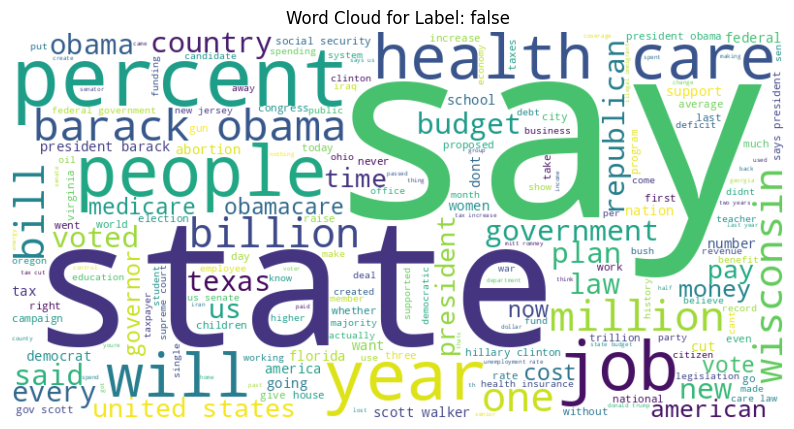

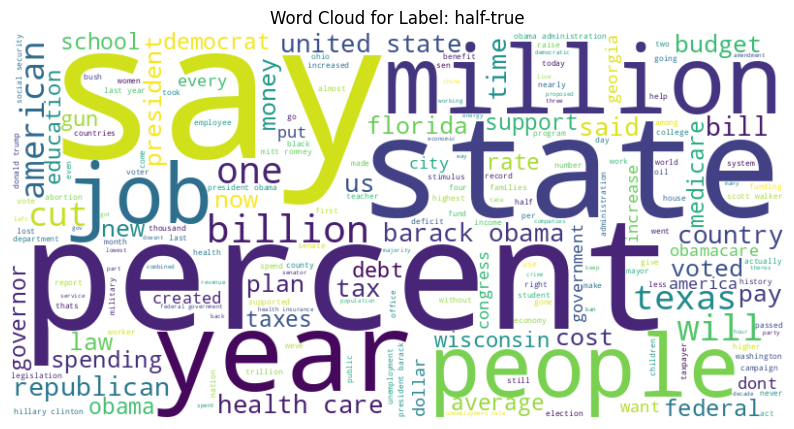

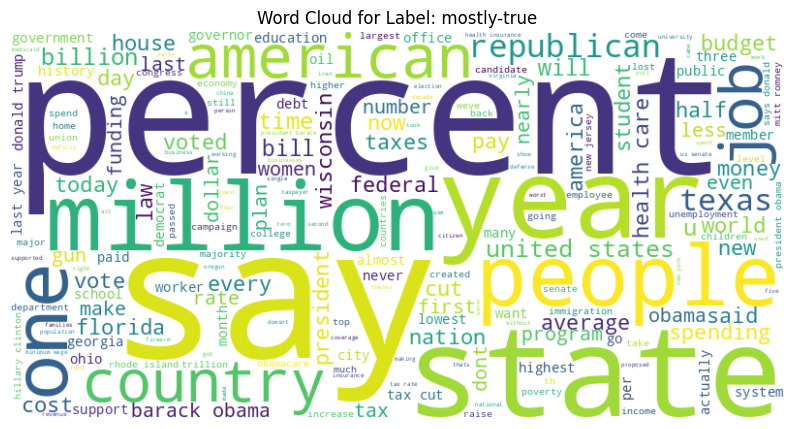

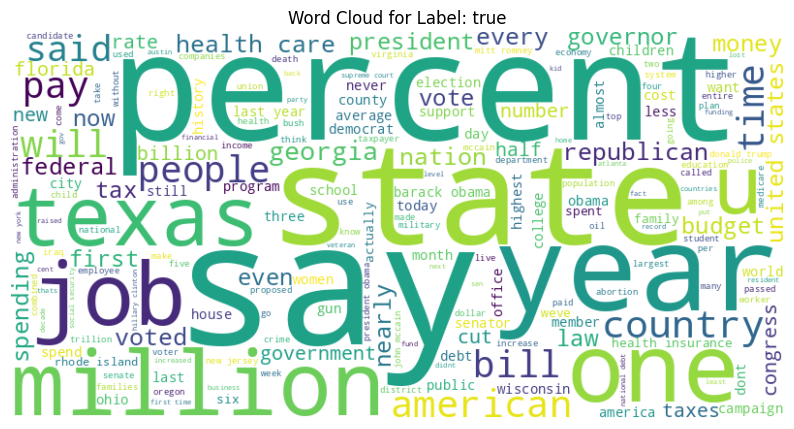

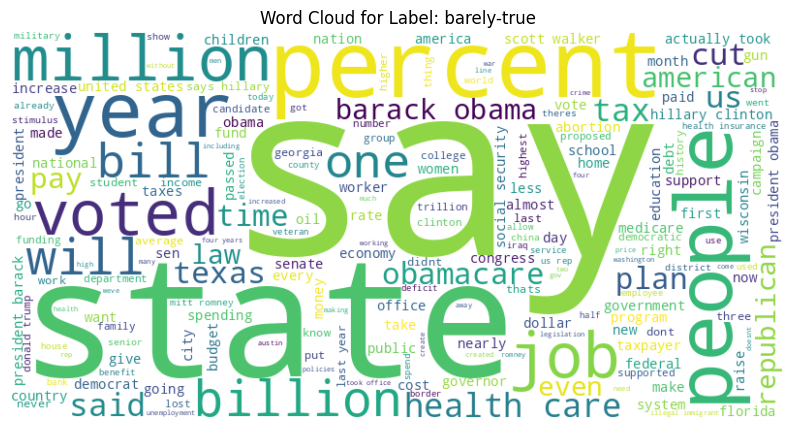

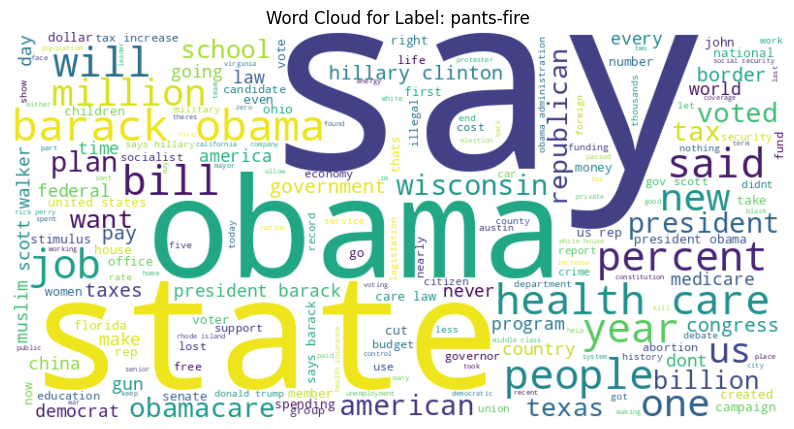

In [ ]:


# Word Cloud of statements for each label
for label in df['label'].unique():
    text = " ".join(df[df['label'] == label]['clean_statement'].dropna())
    if text:  # Only generate word cloud if there is text for the label
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10,6))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Word Cloud for Label: {label}")
        plt.show()
    else:
        print(f"No text available for label: {label}")

# **Applying TF-IDF Vectorization**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_text'], df['label_encoded'], test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print("\nTF-IDF Shapes -> Train:", X_train_tfidf.shape, " Test:", X_test_tfidf.shape)


TF-IDF Shapes -> Train: (8192, 5000)  Test: (2048, 5000)


# **Machine learning cell**

In [ ]:
# Models, metrics, and utilities
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_auc_score
)
import matplotlib.pyplot as plt
import numpy as np
import joblib

RANDOM_STATE = 42
CLASS_NAMES = list(le.classes_)  # uses your existing LabelEncoder

def evaluate_model(estimator, name, Xtr=X_train_tfidf, ytr=y_train, Xte=X_test_tfidf, yte=y_test):
    """Fit, evaluate, and visualize — without repeating logic across models."""
    print(f"\n{name}\n" + "-"*len(name))
    estimator.fit(Xtr, ytr)

    y_pred = estimator.predict(Xte)
    acc = accuracy_score(yte, y_pred)
    f1_macro = f1_score(yte, y_pred, average='macro')
    f1_weighted = f1_score(yte, y_pred, average='weighted')

    # AUC if scores/probabilities are available
    auc = np.nan
    if hasattr(estimator, "predict_proba"):
        y_score = estimator.predict_proba(Xte)
        auc = roc_auc_score(yte, y_score, multi_class="ovr")
    elif hasattr(estimator, "decision_function"):
        y_score = estimator.decision_function(Xte)
        auc = roc_auc_score(yte, y_score, multi_class="ovr")

    print(f"Accuracy: {acc:.4f} | Macro-F1: {f1_macro:.4f} | Weighted-F1: {f1_weighted:.4f}" +
          ("" if np.isnan(auc) else f" | ROC-AUC (OvR): {auc:.4f}"))
    print("\nClassification report:\n")
    print(classification_report(yte, y_pred, target_names=CLASS_NAMES, digits=4))

    # Confusion matrix (normalized for readability)
    cm = confusion_matrix(yte, y_pred, labels=range(len(CLASS_NAMES)), normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_NAMES)
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f"{name} — Normalized Confusion Matrix")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return {
        "model_name": name,
        "estimator": estimator,
        "accuracy": acc,
        "macro_f1": f1_macro,
        "weighted_f1": f1_weighted,
        "roc_auc_ovr": auc
    }


## **Models**

In [ ]:
models = {
    "LogisticRegression": LogisticRegression(
        max_iter=2000, solver="liblinear", random_state=RANDOM_STATE
    ),
    "LinearSVC": LinearSVC(
        C=1.0, random_state=RANDOM_STATE
    ),

    "RandomForest": RandomForestClassifier(
        n_estimators=300, max_depth=None, n_jobs=-1, random_state=RANDOM_STATE
    )

}


In [ ]:
from sklearn.metrics import (
    accuracy_score, f1_score, classification_report, confusion_matrix,
    ConfusionMatrixDisplay, roc_auc_score
)
from scipy.special import softmax
import numpy as np
import matplotlib.pyplot as plt

def evaluate_model(estimator, name, Xtr=X_train_tfidf, ytr=y_train, Xte=X_test_tfidf, yte=y_test):
    """Fit, evaluate, and visualize — robust to models without predict_proba."""
    print(f"\n{name}\n" + "-"*len(name))
    estimator.fit(Xtr, ytr)

    y_pred = estimator.predict(Xte)
    acc = accuracy_score(yte, y_pred)
    f1_macro = f1_score(yte, y_pred, average='macro')
    f1_weighted = f1_score(yte, y_pred, average='weighted')

    # Robust ROC-AUC (multiclass OvR): try predict_proba; else softmax(decision_function); else NaN
    auc = np.nan
    try:
        if hasattr(estimator, "predict_proba"):
            y_score = estimator.predict_proba(Xte)
            # For binary classification, roc_auc_score expects y_score as probabilities of the positive class
            # If len(CLASS_NAMES) == 2, it's binary; otherwise, it's multi-class.
            if len(CLASS_NAMES) == 2:
                auc = roc_auc_score(yte, y_score[:, 1]) # Use probabilities of the positive class (index 1)
            else:
                auc = roc_auc_score(yte, y_score, multi_class="ovr")
        elif hasattr(estimator, "decision_function"):
            raw = estimator.decision_function(Xte)
            # Ensure 2D for binary edge-cases; then softmax to get pseudo-probabilities
            if raw.ndim == 1:
                raw = np.vstack([-raw, raw]).T
            y_score = softmax(raw, axis=1)
            # For binary classification, roc_auc_score expects y_score as probabilities of the positive class
            if len(CLASS_NAMES) == 2:
                auc = roc_auc_score(yte, y_score[:, 1]) # Use probabilities of the positive class (index 1)
            else:
                auc = roc_auc_score(yte, y_score, multi_class="ovr")
    except Exception as e:
        # If any issue arises (e.g., degenerate classes), we skip AUC gracefully and print the error
        print(f"Warning: ROC-AUC calculation failed with error: {e}")
        auc = np.nan

    print(f"Accuracy: {acc:.4f} | Macro-F1: {f1_macro:.4f} | Weighted-F1: {f1_weighted:.4f}" +
          ("" if np.isnan(auc) else f" | ROC-AUC (OvR): {auc:.4f}"))
    print("\nClassification report:\n")
    print(classification_report(yte, y_pred, target_names=CLASS_NAMES, digits=4))

    # Confusion matrix (normalized)
    cm = confusion_matrix(yte, y_pred, labels=range(len(CLASS_NAMES)), normalize='true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=CLASS_NAMES)
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f"{name} — Normalized Confusion Matrix")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

    return {
        "model_name": name,
        "estimator": estimator,
        "accuracy": acc,
        "macro_f1": f1_macro,
        "weighted_f1": f1_weighted,
        "roc_auc_ovr": auc
    }


LogisticRegression
------------------
Accuracy: 0.2568 | Macro-F1: 0.2500 | Weighted-F1: 0.2523 | ROC-AUC (OvR): 0.6110

Classification report:

              precision    recall  f1-score   support

 barely-true     0.2358    0.1593    0.1901       339
       false     0.2477    0.3342    0.2845       401
   half-true     0.2595    0.3265    0.2892       438
 mostly-true     0.2398    0.2775    0.2573       382
  pants-fire     0.4906    0.1757    0.2587       148
        true     0.2716    0.1853    0.2203       340

    accuracy                         0.2568      2048
   macro avg     0.2908    0.2431    0.2500      2048
weighted avg     0.2683    0.2568    0.2523      2048



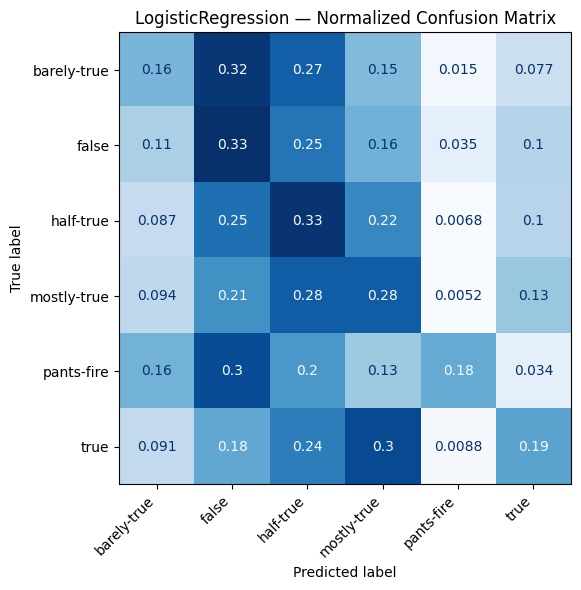


LinearSVC
---------
Accuracy: 0.2266 | Macro-F1: 0.2255 | Weighted-F1: 0.2252 | ROC-AUC (OvR): 0.5809

Classification report:

              precision    recall  f1-score   support

 barely-true     0.2064    0.1711    0.1871       339
       false     0.2242    0.2544    0.2383       401
   half-true     0.2377    0.2648    0.2505       438
 mostly-true     0.2195    0.2356    0.2273       382
  pants-fire     0.2500    0.2432    0.2466       148
        true     0.2296    0.1824    0.2033       340

    accuracy                         0.2266      2048
   macro avg     0.2279    0.2252    0.2255      2048
weighted avg     0.2260    0.2266    0.2252      2048



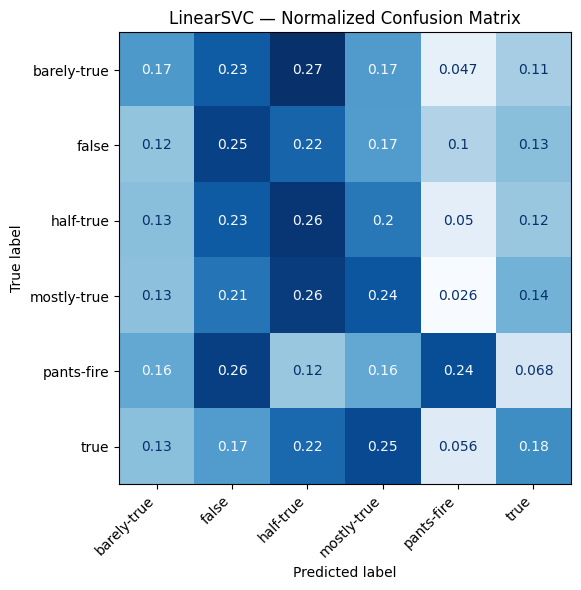


RandomForest
------------
Accuracy: 0.2700 | Macro-F1: 0.2526 | Weighted-F1: 0.2539 | ROC-AUC (OvR): 0.6144

Classification report:

              precision    recall  f1-score   support

 barely-true     0.1829    0.0885    0.1193       339
       false     0.2592    0.4589    0.3312       401
   half-true     0.2511    0.2580    0.2545       438
 mostly-true     0.2931    0.3874    0.3337       382
  pants-fire     0.4688    0.2027    0.2830       148
        true     0.3097    0.1412    0.1939       340

    accuracy                         0.2700      2048
   macro avg     0.2941    0.2561    0.2526      2048
weighted avg     0.2747    0.2700    0.2539      2048



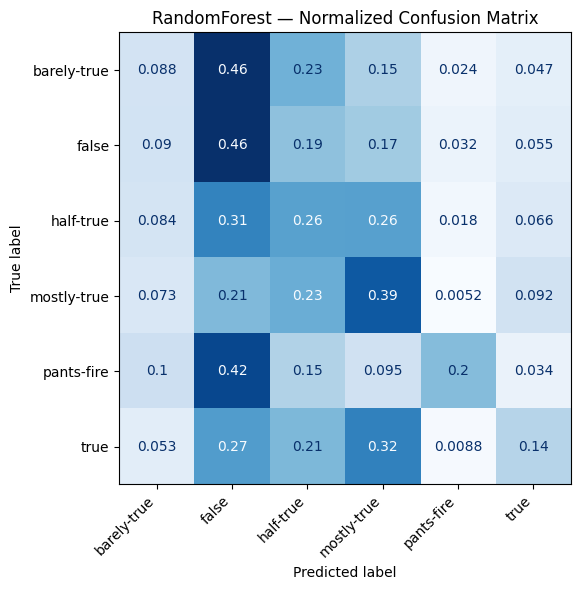


Model leaderboard (sorted by Macro-F1):

        model_name  accuracy  macro_f1  weighted_f1  roc_auc_ovr
      RandomForest  0.270020  0.252615     0.253925     0.614435
LogisticRegression  0.256836  0.250015     0.252280     0.610997
         LinearSVC  0.226562  0.225514     0.225173     0.580857


In [ ]:
import pandas as pd

results, trained = [], {}

for name, est in models.items():
    out = evaluate_model(est, name)
    results.append({k: v for k, v in out.items() if k != "estimator"})
    trained[name] = out["estimator"]

results_df = pd.DataFrame(results).sort_values("macro_f1", ascending=False)
print("\nModel leaderboard (sorted by Macro-F1):\n")
print(results_df[["model_name", "accuracy", "macro_f1", "weighted_f1", "roc_auc_ovr"]].to_string(index=False))


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create the binary string label column
df['bi_label_str'] = df['label'].apply(
    lambda status: 'true' if status in ['true', 'mostly-true', 'half-true', 'barely-true']
                   else 'false' if status in ['false', 'pants-fire']
                   else None
)

# Initialize a new LabelEncoder for the binary labels
bi_le = LabelEncoder()

# Encode the new binary label column
df['bi_label_encoded'] = bi_le.fit_transform(df['bi_label_str'])

print("Binary Label Mapping:", dict(zip(bi_le.classes_, bi_le.transform(bi_le.classes_))))
print("\nValue counts for the new binary label:")
print(df['bi_label_str'].value_counts())
print("\nValue counts for the new binary encoded label:")
print(df['bi_label_encoded'].value_counts())


Binary Label Mapping: {'false': np.int64(0), 'true': np.int64(1)}

Value counts for the new binary label:
bi_label_str
true     7406
false    2834
Name: count, dtype: int64

Value counts for the new binary encoded label:
bi_label_encoded
1    7406
0    2834
Name: count, dtype: int64


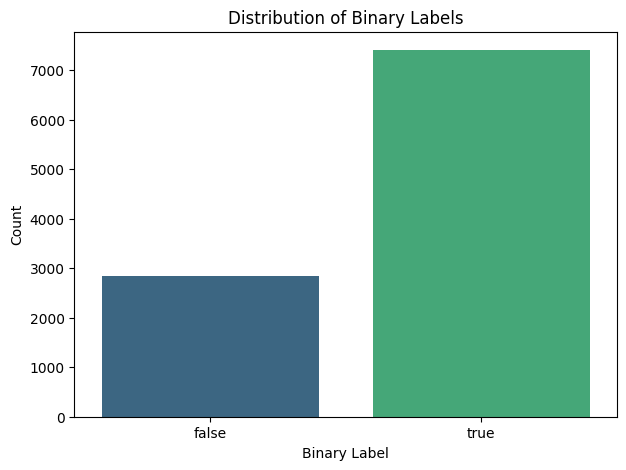

In [ ]:
plt.figure(figsize=(7, 5))
sns.countplot(data=df, x='bi_label_str', palette='viridis', hue='bi_label_str', legend=False)
plt.title('Distribution of Binary Labels')
plt.xlabel('Binary Label')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# This is crucial for evaluating model performance on unseen data
# `test_size=0.2` allocates 20% of the data to the test set
# `random_state=42` ensures reproducibility of the split, meaning the same rows will be in train/test each time
X_train_bi, X_test_bi, y_train_bi, y_test_bi = train_test_split(
    df['cleaned_text'], df['bi_label_encoded'], test_size=0.2, random_state=42)

print("Shape of X_train_bi:", X_train_bi.shape)
print("Shape of X_test_bi:", X_test_bi.shape)
print("Shape of y_train_bi:", y_train_bi.shape)
print("Shape of y_test_bi:", y_test_bi.shape)

Shape of X_train_bi: (8192,)
Shape of X_test_bi: (2048,)
Shape of y_train_bi: (8192,)
Shape of y_test_bi: (2048,)


In [ ]:
vectorizer_bi = TfidfVectorizer(
    max_features=5000, # Limits the number of features (vocabulary size) to the top 5000 most frequent terms.
    stop_words='english' # Removes common English stop words (like 'the', 'is', 'and') that usually don't carry much meaning.
)
X_train_tfidf_bi = vectorizer_bi.fit_transform(X_train_bi)
X_test_tfidf_bi = vectorizer_bi.transform(X_test_bi)

print("\nTF-IDF Shapes (Binary) -> Train:", X_train_tfidf_bi.shape, " Test:", X_test_tfidf_bi.shape)


TF-IDF Shapes (Binary) -> Train: (8192, 5000)  Test: (2048, 5000)



--- Evaluating Models for Binary Classification ---


LogisticRegression
------------------
Accuracy: 0.7378 | Macro-F1: 0.5282 | Weighted-F1: 0.6741 | ROC-AUC (OvR): 0.6526

Classification report:

              precision    recall  f1-score   support

       false     0.5448    0.1330    0.2138       549
        true     0.7513    0.9593    0.8427      1499

    accuracy                         0.7378      2048
   macro avg     0.6480    0.5461    0.5282      2048
weighted avg     0.6959    0.7378    0.6741      2048



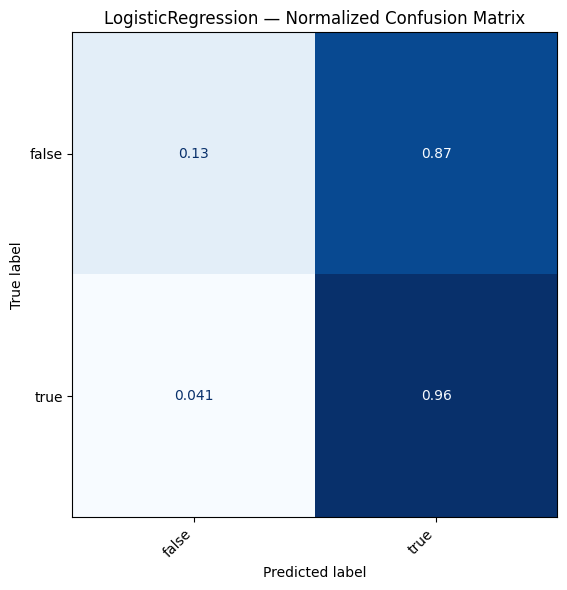


LinearSVC
---------
Accuracy: 0.6855 | Macro-F1: 0.5723 | Weighted-F1: 0.6744 | ROC-AUC (OvR): 0.6192

Classification report:

              precision    recall  f1-score   support

       false     0.3933    0.3188    0.3521       549
        true     0.7667    0.8199    0.7924      1499

    accuracy                         0.6855      2048
   macro avg     0.5800    0.5693    0.5723      2048
weighted avg     0.6666    0.6855    0.6744      2048



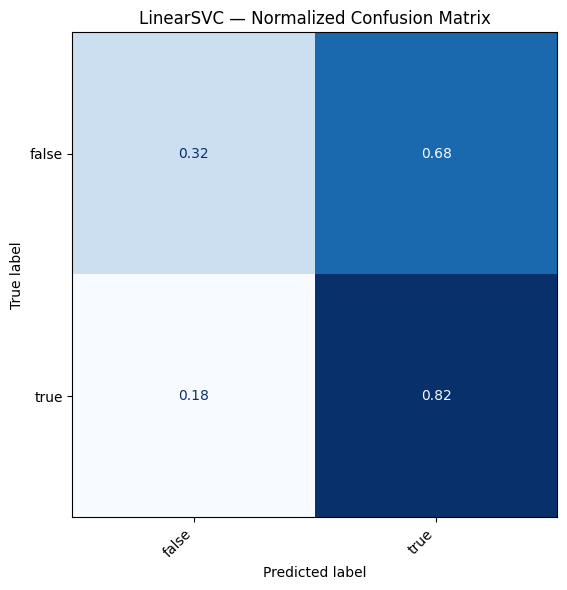


RandomForest
------------
Accuracy: 0.7437 | Macro-F1: 0.5482 | Weighted-F1: 0.6861 | ROC-AUC (OvR): 0.6433

Classification report:

              precision    recall  f1-score   support

       false     0.5789    0.1603    0.2511       549
        true     0.7569    0.9573    0.8454      1499

    accuracy                         0.7437      2048
   macro avg     0.6679    0.5588    0.5482      2048
weighted avg     0.7092    0.7437    0.6861      2048



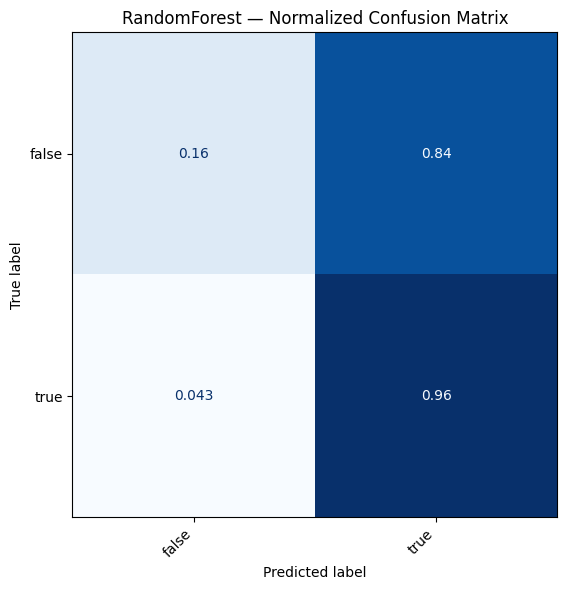


Model leaderboard for Binary Classification (sorted by Macro-F1):

        model_name  accuracy  macro_f1  weighted_f1  roc_auc_ovr
         LinearSVC  0.685547  0.572252     0.674368     0.619234
      RandomForest  0.743652  0.548215     0.686051     0.643290
LogisticRegression  0.737793  0.528212     0.674074     0.652627


In [ ]:
import pandas as pd

results_bi, trained_bi = [], {}

# Store original CLASS_NAMES and define binary class names
ORIGINAL_CLASS_NAMES = CLASS_NAMES
CLASS_NAMES = list(bi_le.classes_)

print("\n--- Evaluating Models for Binary Classification ---\n")

for name, est in models.items():
    # Use the binary-specific TF-IDF data and labels
    out = evaluate_model(est, name, Xtr=X_train_tfidf_bi, ytr=y_train_bi, Xte=X_test_tfidf_bi, yte=y_test_bi)
    results_bi.append({k: v for k, v in out.items() if k != "estimator"})
    trained_bi[name] = out["estimator"]

results_df_bi = pd.DataFrame(results_bi).sort_values("macro_f1", ascending=False)
print("\nModel leaderboard for Binary Classification (sorted by Macro-F1):\n")
print(results_df_bi[["model_name", "accuracy", "macro_f1", "weighted_f1", "roc_auc_ovr"]].to_string(index=False))

# Revert CLASS_NAMES to original multi-class labels after binary evaluation
CLASS_NAMES = ORIGINAL_CLASS_NAMES


Original class distribution (binary train):
Counter({1: 5907, 0: 2285})

Resampled class distribution (binary train with SMOTE):
Counter({0: 5907, 1: 5907})

--- Evaluating Models on SMOTE-Resampled Data ---


LogisticRegression
------------------
Accuracy: 0.6416 | Macro-F1: 0.5815 | Weighted-F1: 0.6551 | ROC-AUC (OvR): 0.6420

Classification report:

              precision    recall  f1-score   support

       false     0.3721    0.4900    0.4230       549
        true     0.7887    0.6971    0.7401      1499

    accuracy                         0.6416      2048
   macro avg     0.5804    0.5936    0.5815      2048
weighted avg     0.6770    0.6416    0.6551      2048



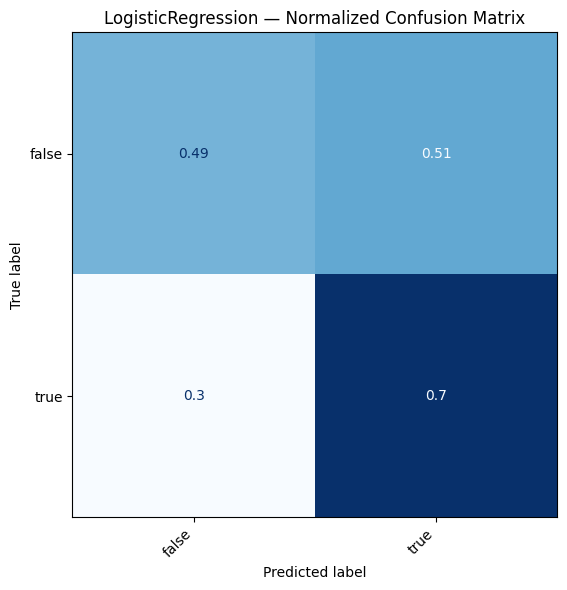


LinearSVC
---------
Accuracy: 0.6226 | Macro-F1: 0.5610 | Weighted-F1: 0.6373 | ROC-AUC (OvR): 0.6094

Classification report:

              precision    recall  f1-score   support

       false     0.3470    0.4627    0.3966       549
        true     0.7758    0.6811    0.7254      1499

    accuracy                         0.6226      2048
   macro avg     0.5614    0.5719    0.5610      2048
weighted avg     0.6609    0.6226    0.6373      2048



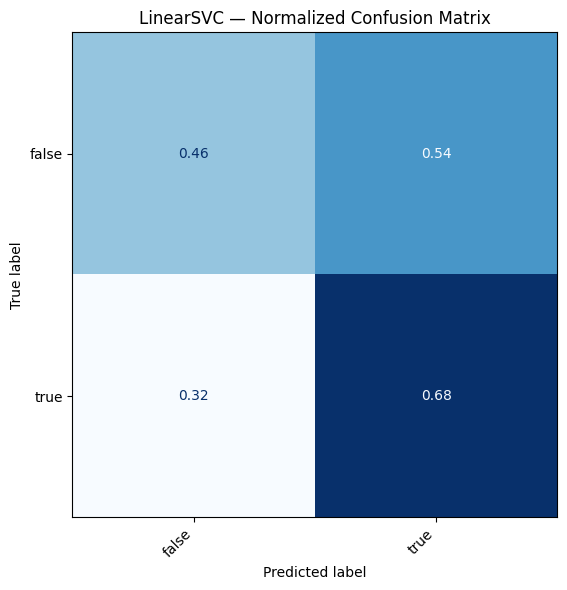


RandomForest
------------
Accuracy: 0.7300 | Macro-F1: 0.5877 | Weighted-F1: 0.7001 | ROC-AUC (OvR): 0.6499

Classification report:

              precision    recall  f1-score   support

       false     0.4932    0.2659    0.3456       549
        true     0.7700    0.8999    0.8299      1499

    accuracy                         0.7300      2048
   macro avg     0.6316    0.5829    0.5877      2048
weighted avg     0.6958    0.7300    0.7001      2048



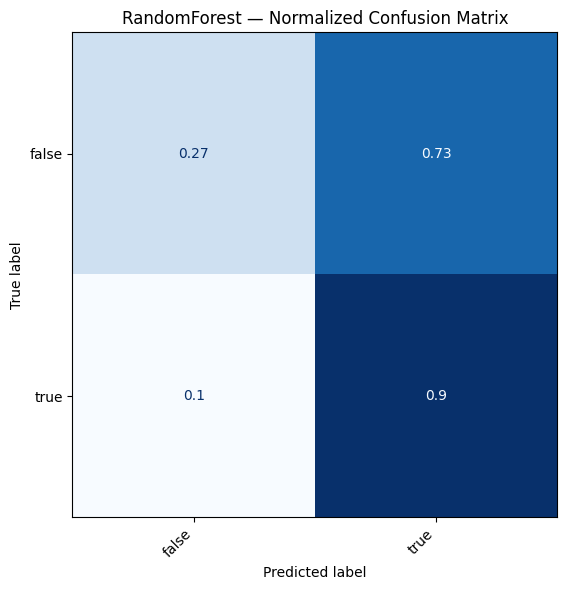


Model leaderboard for Binary Classification (SMOTE-balanced, sorted by Macro-F1):

        model_name  accuracy  macro_f1  weighted_f1  roc_auc_ovr
      RandomForest  0.729980  0.587730     0.700064     0.649910
LogisticRegression  0.641602  0.581520     0.655073     0.642024
         LinearSVC  0.622559  0.560982     0.637250     0.609436


In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print("Original class distribution (binary train):")
print(Counter(y_train_bi))

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf_bi, y_train_bi)

print("\nResampled class distribution (binary train with SMOTE):")
print(Counter(y_resampled))

print("\n--- Evaluating Models on SMOTE-Resampled Data ---\n")

results_smote_bi, trained_smote_bi = [], {}

# Store original CLASS_NAMES and define binary class names
ORIGINAL_CLASS_NAMES = CLASS_NAMES
CLASS_NAMES = list(bi_le.classes_)

for name, est in models.items():
    # Use the SMOTE-resampled training data and original test data
    out = evaluate_model(est, name, Xtr=X_resampled, ytr=y_resampled, Xte=X_test_tfidf_bi, yte=y_test_bi)
    results_smote_bi.append({k: v for k, v in out.items() if k != "estimator"})
    trained_smote_bi[name] = out["estimator"]

results_df_smote_bi = pd.DataFrame(results_smote_bi).sort_values("macro_f1", ascending=False)
print("\nModel leaderboard for Binary Classification (SMOTE-balanced, sorted by Macro-F1):\n")
print(results_df_smote_bi[["model_name", "accuracy", "macro_f1", "weighted_f1", "roc_auc_ovr"]].to_string(index=False))

# Revert CLASS_NAMES to original multi-class labels after binary evaluation
CLASS_NAMES = ORIGINAL_CLASS_NAMES

# Task
Prepare the text data (`X_train_bi`, `X_test_bi`) for deep learning models by tokenizing it into sequences of integers and then padding these sequences to a uniform length. Calculate class weights for `y_train_bi` to address class imbalance. Then, build, compile, train, and evaluate both an LSTM model and a GRU model using the prepared data and class weights, displaying classification reports and confusion matrices for each. Finally, summarize and compare the performance of these deep learning models against each other and the previously run traditional machine learning models.

## Prepare Text Data for Deep Learning

### Subtask:
Tokenize the raw text data (`X_train_bi`, `X_test_bi`) into sequences of integers and then pad these sequences to a uniform length suitable for recurrent neural networks. This step transforms the text into numerical inputs for the deep learning models.


**Reasoning**:
To prepare the text data for deep learning models, I need to tokenize the text into sequences of integers and then pad these sequences to a uniform length. This involves importing necessary TensorFlow Keras preprocessing utilities, defining vocabulary size and sequence length, fitting a tokenizer, converting texts to sequences, and finally padding them.



In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define vocabulary size and maximum sequence length
MAX_VOCAB_SIZE = 10000
MAX_LEN = 100

# Initialize Tokenizer
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE, oov_token='<unk>')

# Fit tokenizer on training data
print(f"Fitting tokenizer on X_train_bi (first 100 tokens: {X_train_bi.iloc[0][:100]})...")
tokenizer.fit_on_texts(X_train_bi)
print("Tokenizer fitted.")

# Convert texts to sequences
print("Converting texts to sequences...")
train_seq = tokenizer.texts_to_sequences(X_train_bi)
test_seq = tokenizer.texts_to_sequences(X_test_bi)
print("Texts converted to sequences.")

# Pad sequences to a uniform length
print("Padding sequences...")
X_train_padded = pad_sequences(train_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_padded = pad_sequences(test_seq, maxlen=MAX_LEN, padding='post', truncating='post')
print("Sequences padded.")

print(f"Shape of X_train_padded: {X_train_padded.shape}")
print(f"Shape of X_test_padded: {X_test_padded.shape}")

Fitting tokenizer on X_train_bi (first 100 tokens: energyenvironmentgaspricestrade hillaryclinton democrat we are now for the first time ever energy in)...
Tokenizer fitted.
Converting texts to sequences...
Texts converted to sequences.
Padding sequences...
Sequences padded.
Shape of X_train_padded: (8192, 100)
Shape of X_test_padded: (2048, 100)


**Reasoning**:
Now that the text data has been tokenized and padded, the next step in preparing for deep learning models is to calculate class weights for the training labels (`y_train_bi`). This is crucial because the previous output showed an imbalance in the binary labels, which can negatively affect model training.



In [ ]:
from sklearn.utils import class_weight
import numpy as np

# Calculate class weights for y_train_bi to handle class imbalance
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_bi),
    y=y_train_bi
)

# Convert to a dictionary for Keras models
class_weight_dict = dict(enumerate(class_weights))

print("Calculated Class Weights:")
print(class_weight_dict)


Calculated Class Weights:
{0: np.float64(1.7925601750547047), 1: np.float64(0.6934145928559337)}


**Reasoning**:
Now that the data is prepared, I will build an LSTM model for binary classification. This involves defining the architecture with an embedding layer, LSTM layer, dense layers, and compiling it with appropriate loss, optimizer, and metrics.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the LSTM model
embedding_dim = 128 # You can experiment with this dimension

lstm_model = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=embedding_dim, input_length=MAX_LEN),
    LSTM(128, return_sequences=False), # LSTM layer with 128 units, not returning sequences for classification
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

# Compile the model
lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

print("LSTM Model Summary:")
lstm_model.summary()


LSTM Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The previous code produced a UserWarning about `input_length` being deprecated in the `Embedding` layer. Removing this argument will resolve the warning and allow Keras to infer the input shape automatically.



In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the LSTM model
embedding_dim = 128 # You can experiment with this dimension

lstm_model = Sequential([
    Embedding(input_dim=MAX_VOCAB_SIZE, output_dim=embedding_dim), # Removed input_length
    LSTM(128, return_sequences=False), # LSTM layer with 128 units, not returning sequences for classification
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid') # Sigmoid for binary classification
])

# Compile the model
lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

print("LSTM Model Summary:")
lstm_model.summary()

LSTM Model Summary:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

**Reasoning**:
The LSTM model has been defined but not yet trained. I need to train the model using the prepared padded sequences and binary labels, incorporating the calculated class weights to address imbalance. I will also use callbacks for early stopping and learning rate reduction. After training, I will evaluate the model's performance on the test set and display the classification report and confusion matrix, as specified in the overall task.



Training LSTM model...
Epoch 1/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 59s 206ms/step - accuracy: 0.4978 - loss: 0.6966 - precision_1: 0.7243 - recall_1: 0.4825 - val_accuracy: 0.2681 - val_loss: 0.6980 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 50s 195ms/step - accuracy: 0.4677 - loss: 0.6960 - precision_1: 0.7201 - recall_1: 0.4251 - val_accuracy: 0.7319 - val_loss: 0.6735 - val_precision_1: 0.7319 - val_recall_1: 1.0000 - learning_rate: 0.0010
Epoch 3/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 50s 194ms/step - accuracy: 0.5852 - loss: 0.6931 - precision_1: 0.7259 - recall_1: 0.6844 - val_accuracy: 0.2681 - val_loss: 0.6961 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 50s 194ms/step - accuracy: 0.5668 - loss: 0.6885 - precision_1: 0.7320 - recall_1: 0.6424 - val_accuracy: 0.7319 - val_loss: 0.6774 - val_precision_1: 0.7319 - val_recall_1: 1.0000 - lea

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


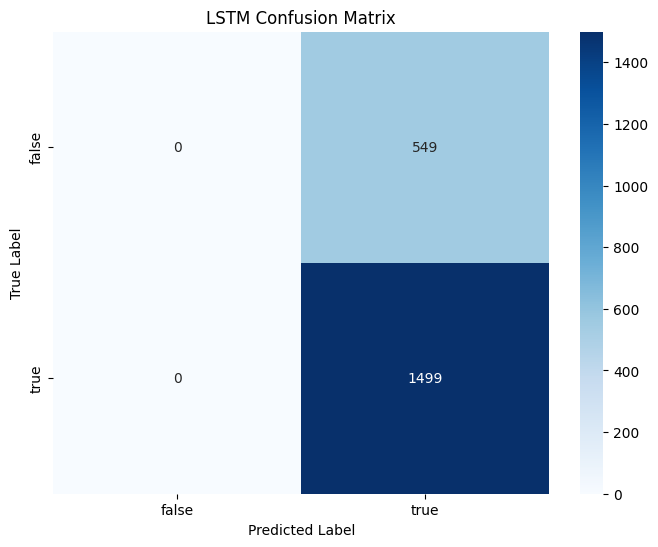

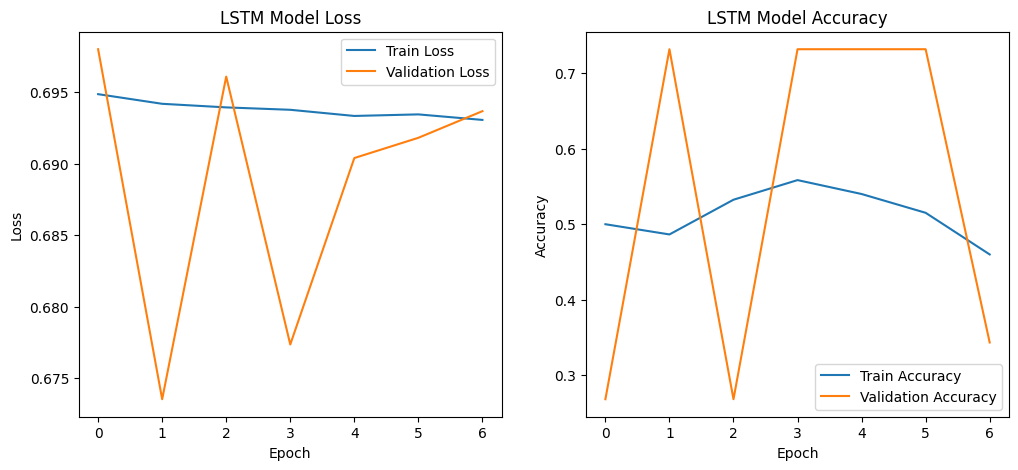

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Callbacks for training
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=0.00001)
]

# Train the LSTM model
print("Training LSTM model...")
history_lstm = lstm_model.fit(
    X_train_padded, y_train_bi,
    epochs=20, # You can adjust the number of epochs
    batch_size=32,
    validation_data=(X_test_padded, y_test_bi),
    class_weight=class_weight_dict,
    callbacks=callbacks
)
print("LSTM model training complete.")

# Evaluate the LSTM model
print("\nEvaluating LSTM model...")
y_pred_proba_lstm = lstm_model.predict(X_test_padded)
y_pred_lstm = (y_pred_proba_lstm > 0.5).astype(int)

# Classification Report
print("\nLSTM Classification Report:")
print(classification_report(y_test_bi, y_pred_lstm, target_names=['false', 'true']))

# Confusion Matrix
cm_lstm = confusion_matrix(y_test_bi, y_pred_lstm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=['false', 'true'], yticklabels=['false', 'true'])
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Plot training history (loss and accuracy)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'], label='Train Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_lstm.history['val_accuracy'], label='Validation Accuracy')
plt.title('LSTM Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
